<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
import string
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = 'Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
iowa.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
print "----------------Info----------------"
iowa.info()
#County Number, County, Category, Category Name contain null values

print "----------------Data Types----------------"
print iowa.dtypes
#State Bottle Cost, Retail, Sale(Dollars) should be converted to numeric type.

print "------------Describe------------"
print iowa.describe()
#Based on the description there are some outliers in the dataset.

print "------------Corr------------"
print iowa.corr()
#Correlation between the variables.

print "------------Cov-------------"
print iowa.cov()
#Covariance between the variables.

----------------Info----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-nu

//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


        Store Number  County Number      Category  Vendor Number  \
count  270955.000000  269878.000000  2.708870e+05   270955.00000   
mean     3590.263701      57.231642  1.043888e+06      256.43443   
std       947.662050      27.341205  5.018211e+04      141.01489   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000            NaN           NaN      115.00000   
50%      3722.000000            NaN           NaN      260.00000   
75%      4378.000000            NaN           NaN      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)   Bottles Sold  Volume Sold (Liters)  \
count  270955.000000       270955.000000  270955.000000         270955.000000   
mean    45974.963300          924.830341       9.871285              8.981351   
std     52757.043086          493.088489      24.040912             28.913690   
min       168.000000           50.000000       1.000000        

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [4]:
#Change the column names to something useful (renaming)
#Change datatype of date to datetime.
#Parse the date into month, and year.
#Change zipcode, to type numeric.
#Change state bottle cost, sale, and state bottle retail to type float.
#Change the uppercase to lowercase text for City and Category_Name for format reasons.
#Remove the $ sign from the costs, and sale.
#------------------------EXTENSIVE CLEANING------------------------
#Remove the outliers from the numeric columns
#Remove unnecessary collumns that can't be mapped to a location.

### 3.2 Clean the columns

In [5]:
#Rename the columns to something useful.
iowa.rename(index=str, columns={"Store Number": "Store_Number", 
                                "Zip Code": "Zip_Code",
                                "County Number" : "County_Number",
                                "Category Number" : "Category_Number",
                                "Category Name" : "Category_Name",
                                "Vendor Number" : "Vendor_Number",
                                "Item Number" : "Item_Number",
                                "Item Description" : "Item_Description",
                                "Bottle Volume (ml)" : "Bottle_Volume(ml)",
                                "State Bottle Cost" : "State_Bottle_Cost",
                                "State Bottle Retail" : "State_Bottle_Retail",
                                "Bottles Sold" : "Bottles_Sold",
                                "Sale (Dollars)" : "Sale_Dollars",
                                "Volume Sold (Liters)" : "Volume_Sold(Liters)",
                                "Volume Sold (Gallons)" : "Volume_Sold(Gallons)"}, inplace = True)

#Remove the $ from the code and replace it with an empty space.
iowa['State_Bottle_Cost'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
iowa['State_Bottle_Retail'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
iowa['Sale_Dollars'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')

#Convert the column Cost, Retail, Dollars, ZipCode to a numeric type.
iowa.State_Bottle_Cost = pd.to_numeric(iowa.State_Bottle_Cost, errors='coerce')
iowa.State_Bottle_Retail = pd.to_numeric(iowa.State_Bottle_Retail, errors = 'coerce')
iowa.Sale_Dollars = pd.to_numeric(iowa.Sale_Dollars, errors= 'coerce')
iowa.Zip_Code = pd.to_numeric(iowa.Zip_Code, errors= 'coerce')

#Convert the date from type object to datetime.
iowa['Date'] =  pd.to_datetime(iowa['Date'], format='%m/%d/%Y')

#For format reasons I decided to convert the all capital columns to a lower case column.
city = []
for i in iowa.City:
    city.append(string.capwords(i))
iowa['City'] = city
 
iowa['Category_Name'] = iowa['Category_Name'].astype('str') 
cat = []
for i in iowa.Category_Name:
    cat.append(string.capwords(i))
iowa['Category_Name'] = cat
iowa.head(5)

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold(Liters),Volume_Sold(Gallons)
0,2015-11-04,3717,Sumner,50674.0,9.0,Bremer,1051100.0,Apricot Brandies,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,Davenport,52807.0,82.0,Scott,1011100.0,Blended Whiskies,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,Cedar Falls,50613.0,7.0,Black Hawk,1011200.0,Straight Bourbon Whiskies,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,Ames,50010.0,85.0,Story,1071100.0,American Cocktails,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,Belmond,50421.0,99.0,Wright,1031080.0,Vodka 80 Proof,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

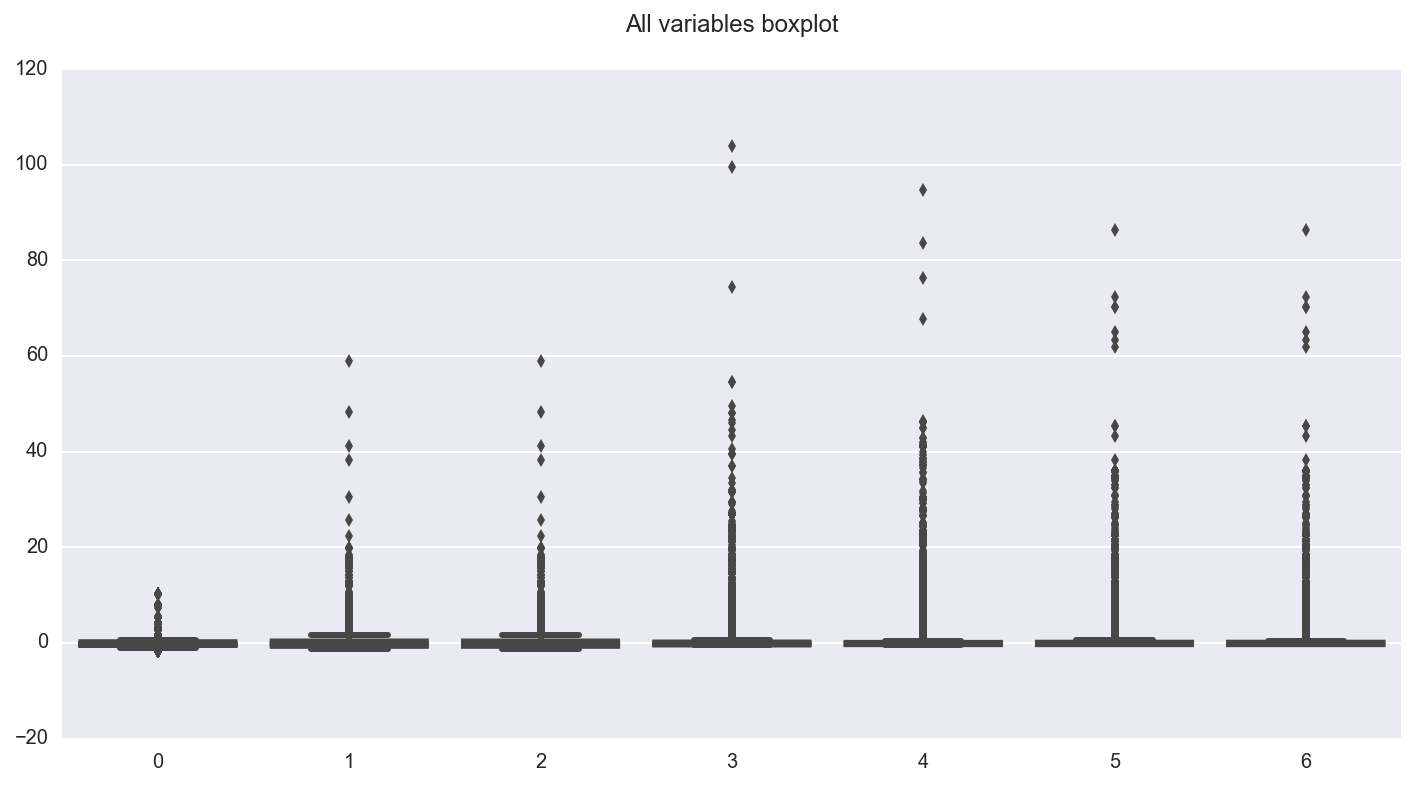

             Date  Store_Number             City  Zip_Code         County  \
0      2015-11-04          3717           Sumner   50674.0         Bremer   
1      2016-03-02          2614        Davenport   52807.0          Scott   
2      2016-02-11          2106      Cedar Falls   50613.0     Black Hawk   
3      2016-02-03          2501             Ames   50010.0          Story   
4      2015-08-18          3654          Belmond   50421.0         Wright   
5      2015-04-20          2569     Cedar Rapids   52402.0           Linn   
6      2015-08-05          2596          Ottumwa   52501.0        Wapello   
7      2015-06-25          3456       Clear Lake   50428.0    Cerro Gordo   
8      2016-01-04          4757        Bondurant   50035.0           Polk   
9      2015-11-10          4346       Shellsburg   52332.0         Benton   
10     2015-09-28          2648  West Des Moines   50265.0           Polk   
11     2015-10-28          2600        Oskaloosa   52577.0        Mahaska   

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

#Parsing the date to Year, and Month
iowa['Year'] = iowa['Date'].dt.year
iowa['Month'] = iowa['Date'].dt.month

#Normalizing the data for the boxplot
ml = (iowa['Bottle_Volume(ml)'] - np.mean(iowa['Bottle_Volume(ml)'])) / np.std(iowa['Bottle_Volume(ml)'])
cost = (iowa['State_Bottle_Cost'] - np.mean(iowa['State_Bottle_Cost']))/np.std(iowa['State_Bottle_Cost'])
retail = (iowa['State_Bottle_Retail'] - np.mean(iowa['State_Bottle_Retail']))/np.std(iowa['State_Bottle_Retail'])
sold = (iowa['Bottles_Sold'] - np.mean(iowa['Bottles_Sold']))/np.std(iowa['Bottles_Sold'])
sale = (iowa['Sale_Dollars'] - np.mean(iowa['Sale_Dollars']))/np.std(iowa['Sale_Dollars'])
liters = (iowa['Volume_Sold(Liters)'] - np.mean(iowa['Volume_Sold(Liters)']))/np.std(iowa['Volume_Sold(Liters)'])
gallon = (iowa['Volume_Sold(Gallons)'] - np.mean(iowa['Volume_Sold(Gallons)'])) / np.std(iowa['Volume_Sold(Gallons)'])

ax = sns.boxplot(data=[ml, cost, retail, sold, sale, liters, gallon], orient='v', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

#Delete Store_Number, County_Number, Category_Number, Vendor_Number, Item_Number since there's no map to a string.
iowa.drop('Category', axis=1, inplace=True)
iowa.drop('Vendor_Number', axis=1, inplace=True)
iowa.drop('Item_Number', axis=1, inplace=True)
iowa.drop('County_Number', axis=1, inplace=True)


#Based on the boxplot we can see there are multiple outliers. I didn't have time to remove the outliers, but I 
#would have taken a subset of the dataframe of the numeric values, and the object types. Then I would have checked
#for values in the numeric dataframe within 3 std. Finally I would have merged the numeric dataframe with the object
#type using the key: Store_Number.
print iowa

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [7]:
listfin = []
test = iowa[(iowa['Year'] == 2015)] #Subset of only stores who operated in 2015
for i in test['Store_Number'].unique():
    date2 = test[test['Store_Number'] == i][['Date']].max() #Take the maximum date of the store
    date1 = test[test['Store_Number'] == i][['Date']].min() #Take the minimum date of the store
    delta = date2 - date1
    if delta[0].days < 365:
        listfin.append(test[test['Store_Number'] == i])
print "These many stores were open for atleast once in 2015:", len(listfin)

#Based on the first part we can see the total number of stores that operated atleast once during 
#2015.By iterating through the unique store numbers I was able to see the minimum and maximum 
#date for the stores.

These many stores were open for atleast once in 2015: 1372


In [8]:
month = iowa[(iowa['Year'] == 2015)].groupby(['Month', 'Store_Number']).count().reset_index()
#The month dataframe contains the dataframe by 2015.
month.sort_values(by = 'Store_Number', ascending = False)
final_month = month.groupby(['Store_Number'])['Month'].count().reset_index()
#The final_month iterates through the store_number and counts the number of times it appears.
#If it appears 12 times we can say its been in operation for 1 year.
final_month.sort_values(by = 'Store_Number', ascending = False)
full_year = final_month[final_month['Month'] == 12] #Looking into months open for the full 12 months.
full_year.sort_values(by = 'Store_Number', ascending = False)
print "These many stores were open for 12 months:", len(full_year)

#I grouped the dataframe by count twice to first get the stores in operation during 2015, the next
#groupby counted the number of times the store appeared during the year. I assumed there would be 
#stores that opened for 2 months ex: January and December which wouldnt count. By taking the count
#of the store its easy to see the stores which are open for the full year.
print "-------------------------"
print full_year.head(10)

These many stores were open for 12 months: 830
-------------------------
   Store_Number  Month
0          2106     12
1          2113     12
2          2130     12
3          2152     12
4          2178     12
5          2190     12
6          2191     12
7          2200     12
8          2205     12
9          2228     12


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [9]:
#I assumed the profit was the difference in Retail and Cost times the number of Bottles Sold.
iowa['Profit'] = (iowa['State_Bottle_Retail'] - iowa['State_Bottle_Cost'])*iowa['Bottles_Sold']

year_2015 = (iowa['Year'] == 2015) #Mask for 2015.
iowa_2015 = iowa[year_2015].groupby(['Year', 'Store_Number']).sum() 
yearly_sale = iowa_2015.sort_values(by = 'Sale_Dollars', ascending = False)
yearly_sale[['Sale_Dollars']]
#Printing the values of the Sale_Dollars in descending order.

#Store 2633 has the greatest sale.

Sale_Dollars
Year Store_Number              
2015 2633            1000783.30
     4829             878812.70
     3385             441983.55
     2512             419746.83
     3420             352020.66
     3952             333311.98
     3814             247417.42
     3354             240365.94
     3773             232460.41
     2670             227442.71
     2593             191333.88
     3447             187650.04
     5102             184582.16
     2629             184574.96
     2625             182118.58
     3524             180805.62
     2663             175203.29
     3820             172792.22
     4167             167173.55
     2648             158668.94
     2561             157134.87
     2616             154160.15
     4677             151507.66
     2502             150094.01
     2500             149121.63
     2106             146326.22
     4312             145363.04
     2501             144833.66
     2619             143958.96
     2506             143431.66
...                         ...
     4954                570.60
     4985                531.96
     4929                528.24
     5152                520.74
     5212                504.54
     5206                500.90
     4737                493.56
     5020                472.08
     5161                463.40
     4961                450.01
     4990                420.81
     4776                376.56
     4121                375.06
     5178                336.07
     4778                305.88
     5191                303.90
     5186                298.86
     5201                289.78
     4834                270.72
     5175                224.91
     5213                180.00
     5056                174.65
     5193                139.50
     4059                105.41
     5192                 90.00
     5053                 67.49
     5215                 56.03
     4939                 53.40
     4567                 44.14
     5205                 39.02

[1372 rows x 1 columns]

### 5.2 Calculate the profit each store is making in 2015.


In [10]:
iowa_2015 = iowa[year_2015].groupby(['Year', 'Store_Number']).sum()
#Calculated the profit in part A.
profit = iowa_2015.sort_values(by = 'Profit', ascending = False)
profit[['Profit']]

#Store 2633 has the greatest Profit

Profit
Year Store_Number           
2015 2633          333816.91
     4829          293196.99
     3385          147884.62
     2512          140143.46
     3420          117593.34
     3952          111230.21
     3814           83004.48
     3354           80244.69
     3773           77525.08
     2670           75945.64
     2593           64197.45
     3447           62683.22
     2629           61636.70
     5102           61588.64
     2625           60794.18
     3524           60528.54
     2663           58512.28
     3820           57650.18
     4167           55756.18
     2648           52950.63
     2561           52844.61
     2616           51472.43
     4677           50542.89
     2502           50345.31
     2500           49801.48
     2106           48838.08
     4312           48493.09
     2501           48430.73
     2619           48105.29
     2506           47925.66
...                      ...
     4954             190.44
     4985             177.32
     4929             176.16
     5152             173.68
     5212             168.28
     5206             167.02
     4737             164.64
     5020             157.56
     5161             154.55
     4961             150.09
     4990             140.28
     4776             125.64
     4121             125.04
     5178             112.19
     4778             102.00
     5191             101.34
     5186              99.72
     5201              96.65
     4834              90.36
     5175              74.99
     5213              60.00
     5056              58.24
     5193              46.53
     4059              35.15
     5192              30.00
     5053              22.50
     5215              18.68
     4939              17.81
     4567              15.06
     5205              13.34

[1372 rows x 1 columns]

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [11]:
#Looking at the Profit per Gallon.
final = iowa[year_2015].groupby(['Year', 'County']).sum()
final['PPG'] = final['Profit']/final['Volume_Sold(Gallons)']
#Sort the data by PPG
answer = final.sort_values(by = 'PPG', ascending = False)
answer[['PPG']]

#Dallas County is making the most PPG, while Hancock makes the least.

PPG
Year County                  
2015 Dallas         21.158576
     Johnson        20.540992
     Polk           19.556484
     Scott          19.367224
     Jefferson      19.309579
     Des Moines     18.952187
     Woodbury       18.753541
     Washington     18.691953
     Buena Vista    18.657669
     Marshall       18.544812
     Pottawattamie  18.542233
     Black Hawk     18.416179
     Lee            18.341931
     Story          18.226835
     Linn           18.132023
     Wapello        18.124438
     Fremont        17.934479
     Union          17.765282
     Poweshiek      17.763426
     Lucas          17.754874
     Monroe         17.739792
     Muscatine      17.614446
     Clarke         17.504841
     Lyon           17.486088
     Louisa         17.432141
     Sioux          17.420043
     Clinton        17.414136
     Page           17.392760
     Mahaska        17.387961
     Dickinson      17.381168
...                       ...
     Adams          15.751083
     Franklin       15.708075
     Davis          15.648322
     Mills          15.587024
     Hamilton       15.561236
     Sac            15.505426
     Crawford       15.502998
     Emmet          15.436695
     Appanoose      15.418386
     Jones          15.392921
     Clay           15.298384
     Jackson        15.237864
     Wayne          15.192545
     Shelby         15.119072
     Ringgold       15.047792
     Calhoun        15.046038
     Howard         15.035564
     Winnebago      14.948293
     Chickasaw      14.947218
     Benton         14.929570
     Madison        14.735313
     Grundy         14.729247
     Wright         14.648298
     Mitchell       14.643295
     Worth          14.422709
     Audubon        14.408834
     Keokuk         14.334868
     Butler         13.868685
     Pocahontas     13.669292
     Hancock        13.045108

[99 rows x 1 columns]

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [12]:
#I didn't have time to finish this but based on my knowledge I understand the library used is
#BeautifulSoup which is responsible for the visualization of the map. By taking the SVG source of the map,
#and iterating through the csv file it is possible to create a color map. Adding if statements comparing the 
#value can help with the color shade.

#Below is the link to the Iowa SVG by counties.
#https://commons.wikimedia.org/wiki/File:Blank_Iowa_county_map.svg

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

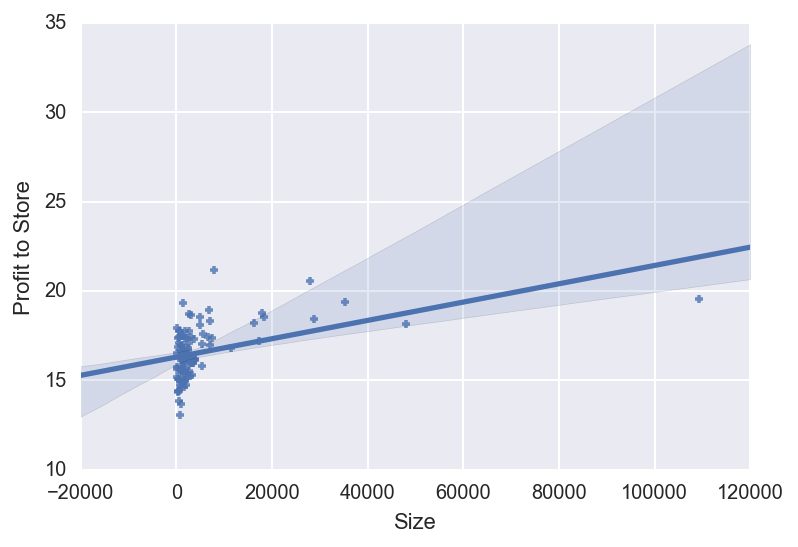

In [13]:
final = iowa[year_2015].groupby(['Year', 'County']).sum()
final['PPG'] = final['Profit'] / final['Volume_Sold(Gallons)']
final[['Volume_Sold(Gallons)', 'PPG']]
x, y = pd.Series(final['Volume_Sold(Gallons)'], name="Size"), pd.Series(final['PPG'], name="Profit to Store")
ax = sns.regplot(x=x, y=y, marker="+")

#There is a positive relationship between the size of the store and the Profit to Store.

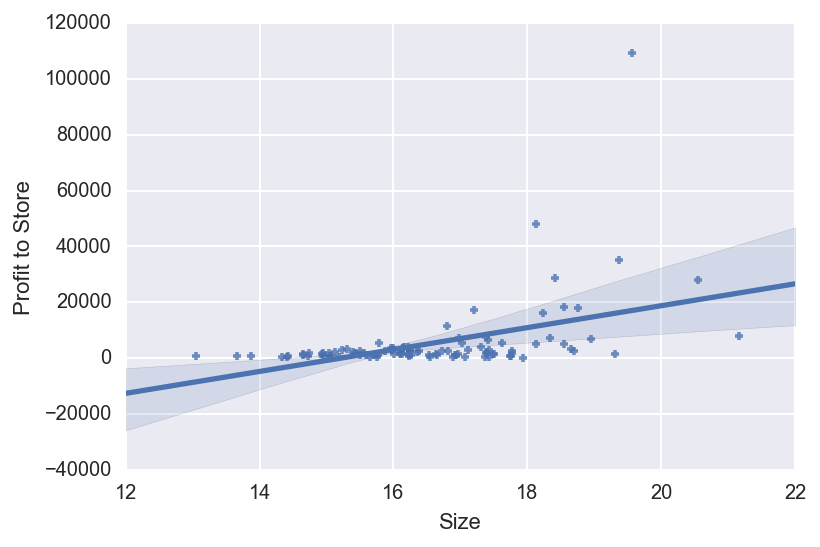

In [14]:
#here is another scatter plot that compares the Profit to Store on the x axis and the Size on the y axis.
x, y = pd.Series(final['PPG'], name="Size"), pd.Series(final['Volume_Sold(Gallons)'], name="Profit to Store")
ax = sns.regplot(x=x, y=y, marker="+")

#It is still a positive relationship between the Size of the store and the Profit.

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [15]:
#Convert liquor type to broader categories.
def item_category_maker(x):
    x = x.lower()
    if 'brand' in x:
        return 'Brandy'
    elif 'whisk' in x:
        return 'Whisky'
    elif 'cocktail' in x:
        return 'Cocktails'
    elif 'vodka' in x:
        return 'Vodka'
    elif 'gin' in x:
        return 'Gin'
    elif "tequila" in x:
        return 'Tequila'
    elif 'rum' in x:
        return 'Rum'
    elif 'schnapps' in x:
        return 'Schnapps'
    elif 'lique' in x:
        return 'Liqueurs'
    elif 'alcohol' in x:
        return 'Alcohol'
    elif 'scotch' in x:
        return 'Scotch'
    elif 'sec' in x:
        return 'Sec'
    elif 'special' in x:
        return 'Speciality'
    elif 'creme' in x:
        return 'Creme'
    elif 'amaretto' in x:
        return 'Amaretto'
    else:
        return 'Other'
iowa['liquor_broad'] = iowa.Category_Name.map(item_category_maker)
print iowa.liquor_broad.unique()
print iowa.liquor_broad.value_counts()

['Brandy' 'Whisky' 'Cocktails' 'Vodka' 'Gin' 'Schnapps' 'Speciality'
 'Tequila' 'Liqueurs' 'Scotch' 'Rum' 'Sec' 'Amaretto' 'Alcohol' 'Other'
 'Creme']
Whisky        81867
Vodka         69945
Rum           22691
Gin           19979
Liqueurs      17891
Brandy        15044
Schnapps      14564
Tequila       12109
Cocktails      6929
Speciality     2539
Scotch         2288
Amaretto       1625
Sec            1236
Other           945
Creme           730
Alcohol         573
Name: liquor_broad, dtype: int64


### 5.7 Do relationships exist between the broader liquor type and profit?

Whisky        81867
Vodka         69945
Rum           22691
Gin           19979
Liqueurs      17891
Brandy        15044
Schnapps      14564
Tequila       12109
Cocktails      6929
Speciality     2539
Scotch         2288
Amaretto       1625
Sec            1236
Other           945
Creme           730
Alcohol         573
Name: liquor_broad, dtype: int64


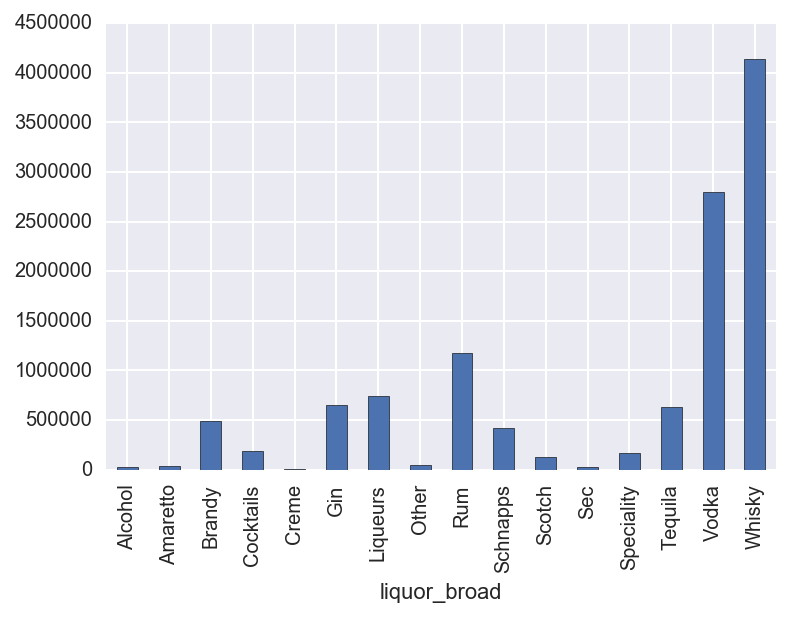

In [16]:
final = iowa.groupby(['liquor_broad']).sum()
answer = final.sort_values(by = 'Profit', ascending = False)

iowa.groupby('liquor_broad')['Profit'].sum().plot(kind='bar')

print iowa.liquor_broad.value_counts()
#Yes, For the broader category whisky, Vodka the profit is higher.
#While the smaller categories have a lower profit

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

                    Profit  Sale_Dollars
liquor_broad                            
Whisky        4.139254e+06  1.235649e+07
Vodka         2.794845e+06  8.362060e+06
Rum           1.175568e+06  3.523870e+06
Liqueurs      7.384243e+05  2.211681e+06
Gin           6.562205e+05  1.963938e+06
Tequila       6.295598e+05  1.886724e+06
Brandy        4.877834e+05  1.461646e+06
Schnapps      4.234070e+05  1.269781e+06
Cocktails     1.922263e+05  5.715929e+05
Speciality    1.624291e+05  4.861879e+05
Scotch        1.275882e+05  3.824738e+05
Other         4.978520e+04  1.493170e+05
Amaretto      3.764337e+04  1.128728e+05
Sec           2.821129e+04  8.458359e+04
Alcohol       2.555254e+04  7.665347e+04
Creme         8.966480e+03  2.686975e+04


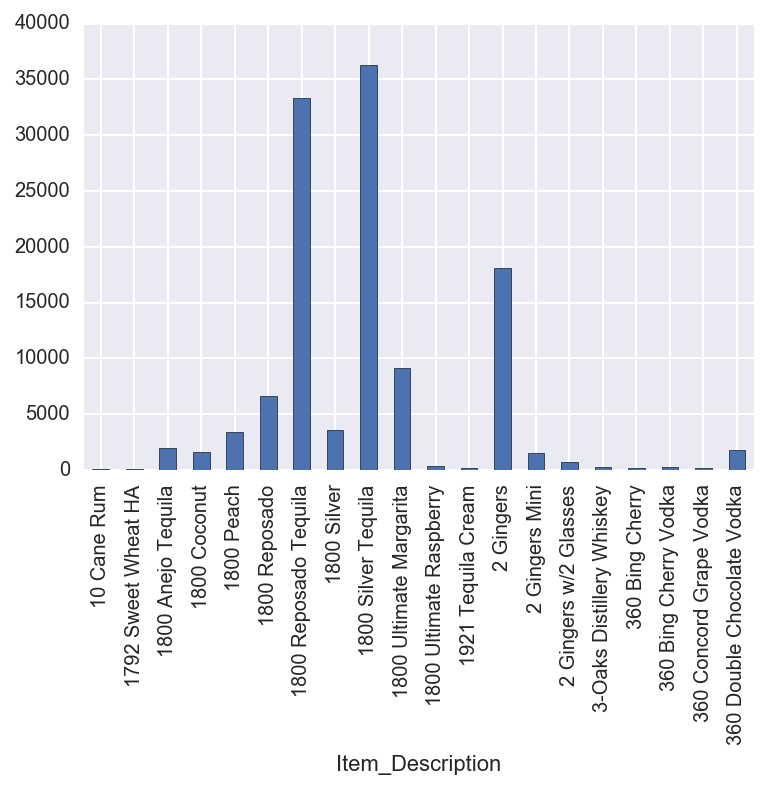

In [17]:
profits = iowa.groupby('liquor_broad')[['Profit', 'Sale_Dollars']].sum()
print profits.sort_values(by = 'Sale_Dollars', ascending = False)

#Took the head of 20 counts for easier display.
iowa.groupby('Item_Description')['Sale_Dollars'].sum().head(20).plot(kind='bar')

#The larger count for the liquor brand tend to have a higher sale.

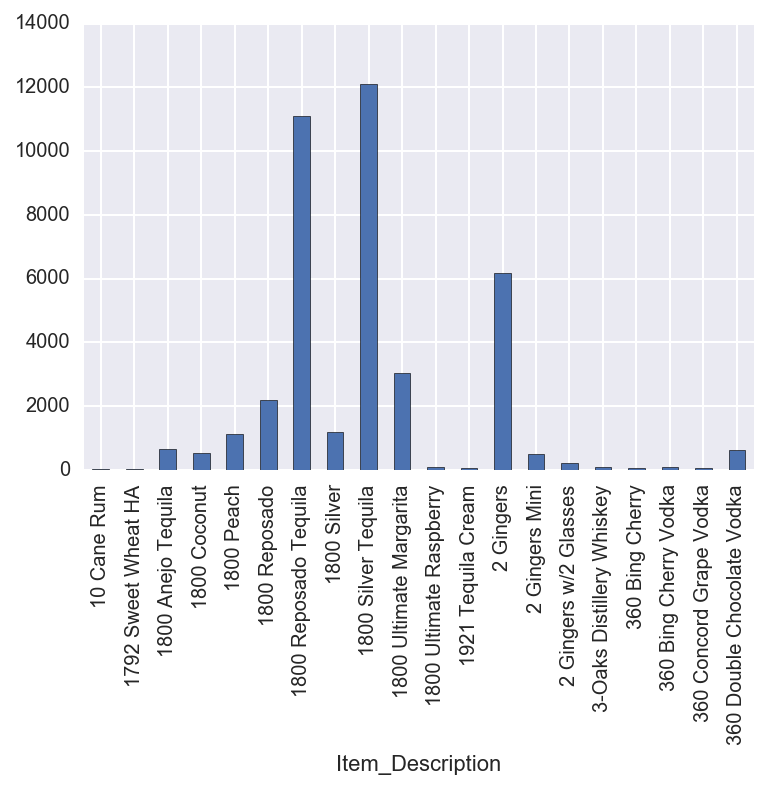

In [18]:
#Took the head of 20 for easier display
iowa.groupby('Item_Description')['Profit'].sum().head(20).plot(kind='bar')
#Similar to the other bar chart the higher count have a higher profit.

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [19]:
#I decided to tax the harder alcohol compared to the lighter ones. I created a new column which 
#contains the Alcohol count of the liquor category. By taking a look at the dataframe sorted by
#Sale_Dollars descending we can see the Sales for each of the category. Based on the result it 
#would be best to tax the harder alcohol as they have a high Sale_Dollars.
def item(x):
    if 'Whisky' in x:
        return '54'
    elif 'Vodka' in x:
        return '43'
    elif 'Rum' in x:
        return '59'
    elif 'Gin' in x:
        return '45'
    elif 'Liquers' in x:
        return '35'
    elif "Brandy" in x:
        return '48'
    elif 'Schanpps' in x:
        return '24'
    elif 'Tequila' in x:
        return '46'
    elif 'Cocktails' in x:
        return '40'
    elif 'Amaretto' in x:
        return '24'
    elif 'Sec' in x:
        return '30'
    elif 'Creme' in x:
        return '17'
    else:
        return 'Other'
iowa['Alcohol'] = iowa.liquor_broad.map(item)
iowa.Alcohol = pd.to_numeric(iowa.Alcohol, errors='coerce')
iowa[['Alcohol']]
final = iowa.groupby('Alcohol')[['Sale_Dollars']].sum()
final.sort_values(by = 'Sale_Dollars', ascending = False)

,Sale_Dollars
Alcohol,
54.0,1.235649e+07
43.0,8.362060e+06
59.0,3.523870e+06
45.0,1.963938e+06
46.0,1.886724e+06
48.0,1.461646e+06
40.0,5.715929e+05
24.0,1.128728e+05
30.0,8.458359e+04


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [20]:
#Creating a mask for the Quarter 1 and 2015/2016
final_2015 = (iowa['Month'] < 4) & (iowa['Year'] == 2015)
final_2016 = (iowa['Month'] < 4) & (iowa['Year'] == 2016)

#Creating two dataframes by grouping County and Sales
iowa_2015 = iowa[final_2015].groupby(['County'])[['Profit']].sum().reset_index()
iowa_2016 = iowa[final_2016].groupby(['County'])[['Profit']].sum().reset_index()

#Create a new dataframe by merging the two new dataframes
iowa_diff = pd.merge(iowa_2015,iowa_2016, on=('County'))

#Rename the merged columns
iowa_diff['Q115_Profit'] = iowa_diff['Profit_x']
iowa_diff['Q116_Profit'] = iowa_diff['Profit_y']
iowa_diff.drop('Profit_x', axis=1, inplace=True)
iowa_diff.drop('Profit_y', axis=1, inplace=True)

#Take the difference between the q1 2016 and 2015 sales
iowa_diff['Difference'] = iowa_diff['Q116_Profit'] - iowa_diff['Q115_Profit']
iowa_diff

#The Q15 Profit contains the sum of the profit for 2015 quarter 1
#The Q16 Profit contains the sum of the profit for 2016 quarter 1
#The difference is the profit difference from Q16 and Q15

,County,Q115_Profit,Q116_Profit,Difference
0,Adair,3411.38,3954.40,543.02
1,Adams,751.31,733.32,-17.99
2,Allamakee,5011.35,6389.27,1377.92
3,Appanoose,5089.05,7186.72,2097.67
4,Audubon,1869.15,1075.77,-793.38
5,Benton,4960.60,4914.26,-46.34
6,Black Hawk,114000.38,118022.92,4022.54
7,Boone,15606.23,12604.70,-3001.53
8,Bremer,13652.13,12536.45,-1115.68
9,Buchanan,9987.40,7793.65,-2193.75


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [21]:
#I decided to create a percentage difference metrics that compares the Profit for 2015 and 2016
#The formula will be (Difference)/Profit2015 * 100 to get the percentage difference.

iowa_diff['Percentage'] = (iowa_diff['Difference']/iowa_diff['Q115_Profit']) * 100
iowa_diff[['Percentage']]

,Percentage
0,15.917898
1,-2.394484
2,27.495984
3,41.219285
4,-42.446032
5,-0.934161
6,3.528532
7,-19.232896
8,-8.172205
9,-21.965176


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [22]:
iowa_diff.sort_values(by = 'Percentage', ascending = False)

#Cedar County has a high percentage increase while Howard has a decrease in percentage.

,County,Q115_Profit,Q116_Profit,Difference,Percentage
15,Cedar,3332.71,6785.09,3452.38,103.590771
97,Worth,2024.36,3960.57,1936.21,95.645537
23,Crawford,7030.91,12931.47,5900.56,83.923134
32,Fayette,6874.10,12632.05,5757.95,83.762965
11,Butler,1568.94,2881.85,1312.91,83.681339
46,Ida,2698.77,4442.49,1743.72,64.611656
3,Appanoose,5089.05,7186.72,2097.67,41.219285
26,Decatur,1039.14,1463.13,423.99,40.802009
12,Calhoun,1781.95,2480.53,698.58,39.203120
85,Tama,4325.43,5932.34,1606.91,37.150295


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [23]:
#Creating two dataframes by grouping County and Profit
iowa_2015 = iowa[final_2015].groupby(['County'])[['Profit']].sum().reset_index()
iowa_2016 = iowa[final_2016].groupby(['County'])[['Profit']].sum().reset_index()

#Create a new dataframe by merging the two new dataframes
iowa_prof = pd.merge(iowa_2015,iowa_2016, on=('County'))

#Rename the merged columns
iowa_prof['Q115_Profit'] = iowa_prof['Profit_x']
iowa_prof['Q116_Profit'] = iowa_prof['Profit_y']
iowa_prof.drop('Profit_x', axis=1, inplace=True)
iowa_prof.drop('Profit_y', axis=1, inplace=True)

#Take the difference between the q1 2016 and 2015 profit
iowa_prof['Difference'] = iowa_prof['Q116_Profit'] - iowa_prof['Q115_Profit']
iowa_prof

iowa_prof['Percentage'] = (iowa_prof['Difference']/iowa_prof['Q115_Profit']) * 100
iowa_prof
iowa_prof.dtypes
iowa_complete = pd.merge(iowa,iowa_prof, on=('County'))
iowa_complete.groupby(['liquor_broad'])[['Percentage']].sum().sort_values(by = 'Percentage', ascending = False)

#Whisky is the best type of liquor to sell to maximize the profit as it has the highest percentage
#in profit increase.

Cedar = iowa_complete['County'] == 'Cedar'
iowa_complete[Cedar].groupby(['County', 'liquor_broad'])[['Percentage']].sum()
#I wouldn't change the location since the percentage in Cedar is still higher than the grouped 
#percentage of Whisky

Percentage
County liquor_broad              
Cedar  Alcohol         207.181543
       Amaretto       1243.089258
       Brandy         3314.904687
       Cocktails      4454.403173
       Creme           414.363086
       Gin            8701.624804
       Liqueurs       6526.218603
       Other           207.181543
       Rum            8908.806347
       Schnapps       8494.443261
       Scotch          103.590771
       Sec             414.363086
       Speciality      414.363086
       Tequila        3107.723144
       Vodka         27969.508298
       Whisky        34806.499215

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


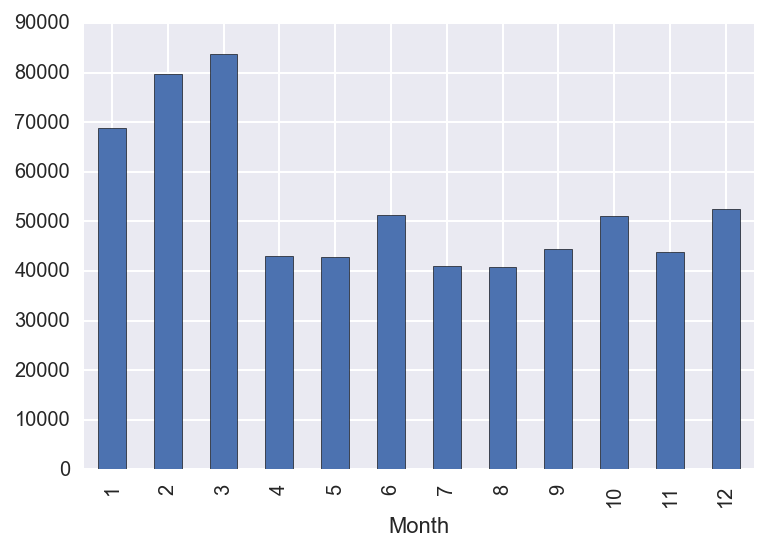

In [24]:
#Do people buy more drinks in the summer?
summer = iowa.groupby(['Month'])[['Volume_Sold(Liters)', 'Volume_Sold(Gallons)']].sum()
summer = summer.sort_values(by = 'Volume_Sold(Gallons)', ascending = False)
iowa.groupby('Month')['Volume_Sold(Gallons)'].sum().plot(kind='bar')

#Most people buy drinks during March. while the least popular months are April and May

In [25]:
#Are liquor sales the highest during December
new = iowa.groupby(['Month'])[['Sale_Dollars']].sum()
new = new.sort_values(by = 'Sale_Dollars', ascending = False)
new.sort_values(by = 'Sale_Dollars', ascending = False)

#Liquor sales are the highest in March

,Sale_Dollars
Month,
3,4562340.80
2,4252368.49
1,3738584.16
12,3056656.60
10,2810088.85
6,2754960.95
11,2460865.60
9,2387918.92
4,2302566.62


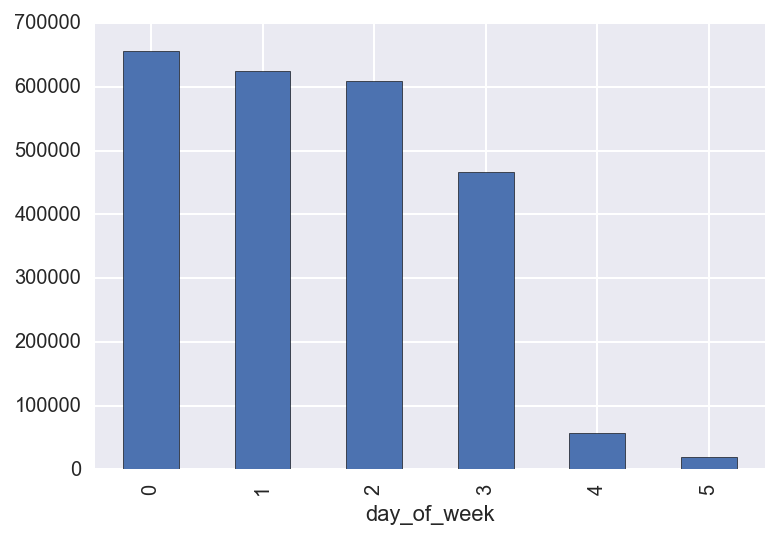

In [26]:
#Do people buy the most alcohol on Thursday?
iowa['day_of_week'] = iowa['Date'].dt.dayofweek
iowa['day_of_week']
#{0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
day = iowa.groupby(['day_of_week'])[['Volume_Sold(Liters)', 'Volume_Sold(Gallons)']].sum()
day = day.sort_values(by = 'Volume_Sold(Gallons)', ascending = False)

iowa.groupby('day_of_week')['Volume_Sold(Liters)'].sum().plot(kind='bar')
#The most common day of the week when ppl buy alcohol is Monday, Saturday is the least common day.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [27]:
final = iowa[(iowa['Year'] == 2015)].groupby(['Year', 'County', 'liquor_broad']).mean()
#Get the Price per Gallon and multiply by 20,000 to get the total cost.
final['CostStore'] = (final['State_Bottle_Cost']/final['Volume_Sold(Gallons)'])*20000
final.sort_values(by = 'Profit', ascending = False)
#To get the time divide the Cost of the Store by the Profit.
final['Time'] = final['CostStore']/final['Profit']
final

Store_Number      Zip_Code  Bottle_Volume(ml)  \
Year County    liquor_broad                                                  
2015 Adair     Alcohol        4468.500000  50847.500000         750.000000   
               Amaretto       4293.600000  50559.200000         950.000000   
               Brandy         4145.250000  50543.083333         671.875000   
               Cocktails      3849.500000  50506.500000        1682.142857   
               Creme          3461.000000  50250.000000         750.000000   
               Gin            3950.560000  50455.720000        1070.000000   
               Liqueurs       4021.333333  50489.200000         783.333333   
               Rum            4266.447368  50397.052632        1003.289474   
               Schnapps       4039.814815  50573.481481         819.444444   
               Scotch         4317.000000  50849.000000         750.000000   
               Sec            3461.000000  50250.000000         950.000000   
               Speciality     4317.000000  50849.000000         750.000000   
               Tequila        4058.600000  50574.920000         825.000000   
               Vodka          4162.146154  50487.653846        1118.846154   
               Whisky         4227.645570  50483.202532        1001.582278   
     Adams     Alcohol        2327.000000  50841.000000         750.000000   
               Brandy         2327.000000  50841.000000         968.750000   
               Cocktails      2327.000000  50841.000000        1750.000000   
               Creme          2327.000000  50841.000000         750.000000   
               Gin            2327.000000  50841.000000        1052.272727   
               Liqueurs       2327.000000  50841.000000         731.000000   
               Rum            2327.000000  50841.000000        1022.727273   
               Schnapps       2327.000000  50841.000000         776.923077   
               Tequila        2327.000000  50841.000000         750.000000   
               Vodka          2327.000000  50841.000000        1083.064516   
               Whisky         2327.000000  50841.000000        1051.666667   
     Allamakee Alcohol        4289.000000  52172.000000         750.000000   
               Amaretto       3892.923077  52165.538462         750.000000   
               Brandy         3754.131579  52168.157895        1062.500000   
               Cocktails      3550.357143  52166.785714        1482.142857   
...                                   ...           ...                ...   
     Woodbury  Vodka          3655.230204  51100.732466         927.757353   
               Whisky         3684.738084  51097.614251         947.911548   
     Worth     Alcohol        3664.000000  50459.000000         750.000000   
               Amaretto       4055.666667  50459.000000         916.666667   
               Brandy         4091.272727  50459.000000         961.363636   
               Cocktails      4251.500000  50459.000000        1682.142857   
               Creme          3664.000000  50459.000000         750.000000   
               Gin            4159.782609  50458.608696        1079.347826   
               Liqueurs       4249.809524  50458.714286         708.333333   
               Other          3664.000000  50459.000000        1500.000000   
               Rum            4323.485714  50458.400000        1178.571429   
               Schnapps       4121.875000  50458.812500         943.750000   
               Sec            3664.000000  50459.000000        1000.000000   
               Speciality     4839.000000  50459.000000         750.000000   
               Tequila        4251.500000  50459.000000        1000.000000   
               Vodka          4146.851351  50458.756757        1122.297297   
               Whisky         4272.808989  50458.696629        1054.213483   
     Wright    Amaretto       3941.000000  50531.000000         875.000000   
               Brandy         4197.785714  50507.85

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?